# **Download Dataset from kaggle**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vencerlanz09/plastic-paper-garbage-bag-synthetic-images")

print("Path to dataset files:", path)

Resuming download from 284164096 bytes (189090973 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/vencerlanz09/plastic-paper-garbage-bag-synthetic-images?dataset_version_number=1 (284164096/473255069) bytes left.


100%|██████████| 451M/451M [00:01<00:00, 107MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vencerlanz09/plastic-paper-garbage-bag-synthetic-images/versions/1


#**Import libraries i will use**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from sklearn.model_selection import train_test_split
# Import Data Science Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers,models
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Model

# System libraries
from pathlib import Path
import os.path

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools

import os
from pathlib import Path
import matplotlib.pyplot as plt
from collections import Counter

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.applications.mobilenet import MobileNet
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import tensorflow as tf
from tensorflow import keras



# **Show image sample**



(300, 300, 3)


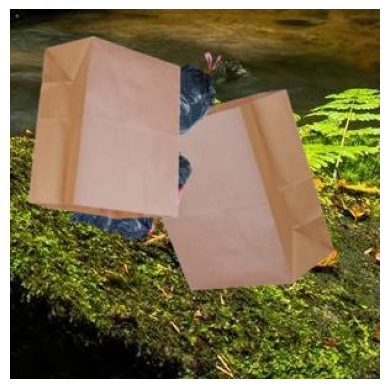

In [ ]:
image_path = '/root/.cache/kagglehub/datasets/vencerlanz09/plastic-paper-garbage-bag-synthetic-images/versions/1/ImageClassesCombinedWithCOCOAnnotations/images_raw/00000010.jpg'
# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

# **check images size in every class**

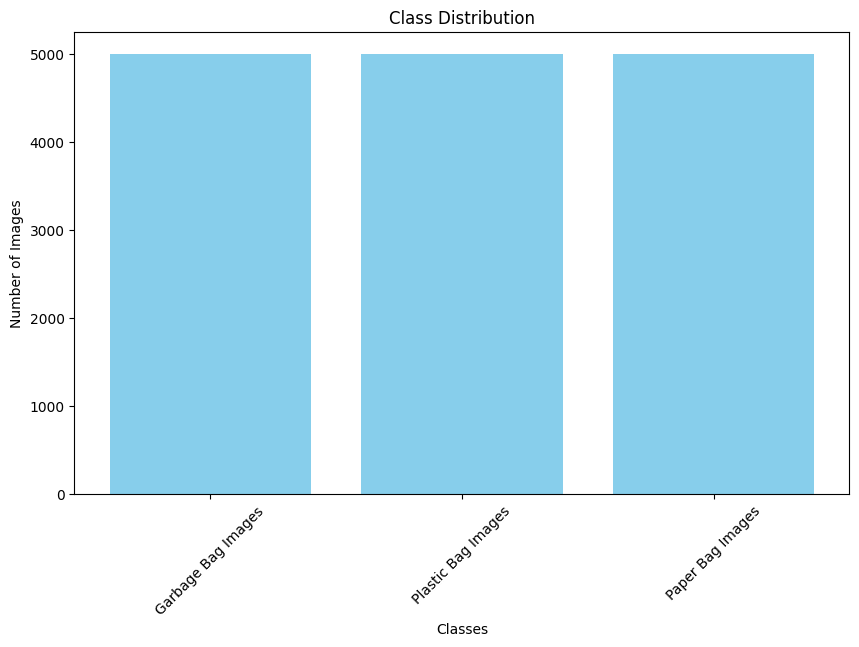

In [ ]:


# Path to your dataset
dataset_path = Path('/root/.cache/kagglehub/datasets/vencerlanz09/plastic-paper-garbage-bag-synthetic-images/versions/1/Bag Classes/Bag Classes')

# Initialize a Counter to store class counts
class_counts = Counter()

# Iterate through each class folder in the dataset
for class_folder in os.listdir(dataset_path):
    class_folder_path = dataset_path / class_folder
    if os.path.isdir(class_folder_path):
        # Count the number of files in each class folder
        num_files = len(os.listdir(class_folder_path))
        class_counts[class_folder] = num_files

# Plot the class counts
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()


In [ ]:
image_dir = Path(dataset_path)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.png')) + list(image_dir.glob(r'**/*.png'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# **show sample of images with labels**

[ 8746  8413  8624  7091 12404  4525  5152 14453  7544  5656  8143  1925
  1574  4082  3220  5046]


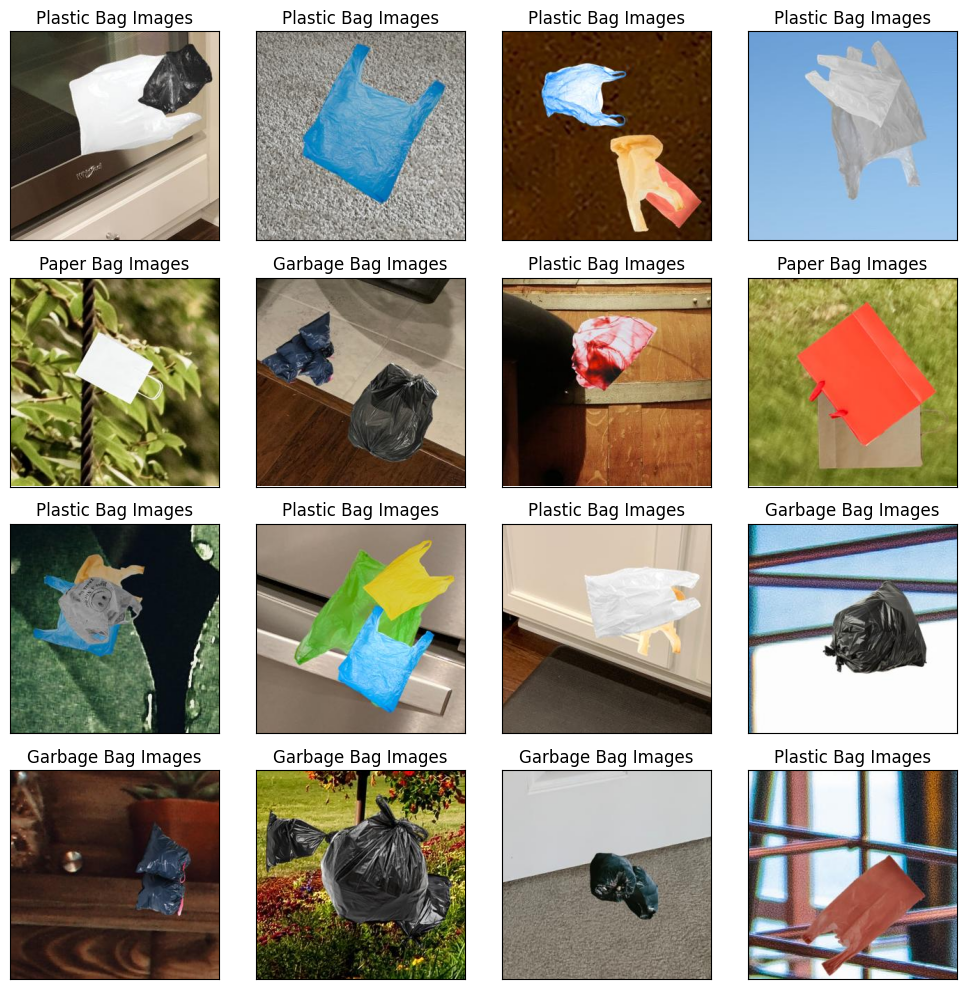

In [ ]:
random_index = np.random.randint(0, len(image_df), 16)
print(random_index)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()

# **Spilt data into 80% train and  20% test**

In [ ]:
train_df, test_df = train_test_split(image_df, test_size=0.2, shuffle=True, random_state=42)
train_df.shape

(12000, 2)

In [ ]:
test_df.shape


(3000, 2)

In [ ]:

train_set = ImageDataGenerator(
        rescale=1./255,
    validation_split=0.2

)

test_set = ImageDataGenerator(
    rescale=1./255,
)

In [ ]:



# Split the data into three categories.
train_images = train_set.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=16,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_set.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=16,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_set.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=16,
    shuffle=False
)

Found 9600 validated image filenames belonging to 3 classes.
Found 2400 validated image filenames belonging to 3 classes.
Found 3000 validated image filenames belonging to 3 classes.


In [ ]:
import pandas as pd

# Get class distribution for the training set
train_class_counts = train_images.labels
train_class_counts = pd.Series(train_class_counts).value_counts()

# Get class distribution for the validation set
val_class_counts = val_images.labels
val_class_counts = pd.Series(val_class_counts).value_counts()

# Get class distribution for the test set
test_class_counts = test_images.labels
test_class_counts = pd.Series(test_class_counts).value_counts()

# Display the results
print("Training Set Class Distribution:")
print(train_class_counts)

print("\nValidation Set Class Distribution:")
print(val_class_counts)

print("\nTest Set Class Distribution:")
print(test_class_counts)


Training Set Class Distribution:
1    3226
2    3188
0    3186
Name: count, dtype: int64

Validation Set Class Distribution:
2    842
1    781
0    777
Name: count, dtype: int64

Test Set Class Distribution:
0    1037
1     993
2     970
Name: count, dtype: int64


# **First using resnet50 pertrained CNN model**

In [ ]:
# Load the MobileNet base model
base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model layers to prevent feature extraction training
for layer in base_model.layers:
    layer.trainable = False


# Define new model
X = Flatten()(base_model.output)
X = Dense(128, activation='relu')(X)
X = BatchNormalization()(X)
X = Dropout(0.5)(X)  # 50% dropout

X = Dense(64, activation='relu')(X)
X = Dropout(0.3)(X)  # 30% dropou

X = Dense(3, activation='softmax')(X)  # Final classification layer for 3 classes

# Build the model
model = Model(inputs=base_model.input, outputs=X)

# Compile the model with a high learning rate
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 36,441,859 (139.01 MB)

 Trainable params: 12,853,891 (49.03 MB)

 Non-trainable params: 23,587,968 (89.98 MB)

In [ ]:


# ModelCheckpoint callback
model_checkpoint = ModelCheckpoint(
    filepath='best_model.keras',     # Save model to this file
    monitor='val_loss', # Monitor validation loss
    save_best_only=True, # Save the model only when validation loss improves
    verbose=1,          # Print messages when saving the model
    save_weights_only=False,  # Save the entire model (architecture + weights)
    mode='min',         # 'min' means to save the model when validation loss is minimized
)

reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)


# Train the model for exactly 10 epochs
history = model.fit(
    train_images,
    epochs=50,                     # Train for up to 10 epochs
    validation_data=val_images,
    callbacks=[reduce_lr_callback, model_checkpoint]  # Add ReduceLROnPlateau, ModelCheckpoint,
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4900 - loss: 1.1460
Epoch 1: val_loss improved from inf to 1.73161, saving model to best_model.keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 58s 71ms/step - accuracy: 0.4901 - loss: 1.1456 - val_accuracy: 0.3867 - val_loss: 1.7316 - learning_rate: 1.0000e-04
Epoch 2/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5803 - loss: 0.9308
Epoch 2: val_loss improved from 1.73161 to 0.91636, saving model to best_model.keras
600/600 ━━━━━━━━━━━━━━━━━━━━ 38s 63ms/step - accuracy: 0.5803 - loss: 0.9308 - val_accuracy: 0.5804 - val_loss: 0.9164 - learning_rate: 1.0000e-04
Epoch 3/50
600/600 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6366 - loss: 0.8100
Epoch 3: val_loss did not improve from 0.91636
600/600 ━━━━━━━━━━━━━━━━━━━━ 43s 66ms/step - accuracy: 0.6366 - loss: 0.8100 - val_accuracy: 0.5446 - val_loss: 0.9950 - learning_rate: 1.0000e-04
Epoch 4/50
599/600 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6497 - loss: 0.7792
Epoch 4: 

In [ ]:
# Retrieve final training accuracy and loss
train_acc = history.history['accuracy'][-1]
train_loss = history.history['loss'][-1]
print(f"Final Training Accuracy: {train_acc:.4f}")
print(f"Final Training Loss: {train_loss:.4f}")
#Validation set Accuracy
val_acc = history.history['val_accuracy'][-1]
val_loss = history.history['val_loss'][-1]
print(f"Final Validation Accuracy: {val_acc:.4f}")
print(f"Final Validation Loss: {val_loss:.4f}")

# Evaluate the model on the testing set
test_loss, test_acc = model.evaluate(test_images)
print(f"Testing Accuracy: {test_acc:.4f}")
print(f"Testing Loss: {test_loss:.4f}")

Final Training Accuracy: 0.8130
Final Training Loss: 0.4619
Final Validation Accuracy: 0.7525
Final Validation Loss: 0.5983
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.7653 - loss: 0.5768
Testing Accuracy: 0.7653
Testing Loss: 0.5787


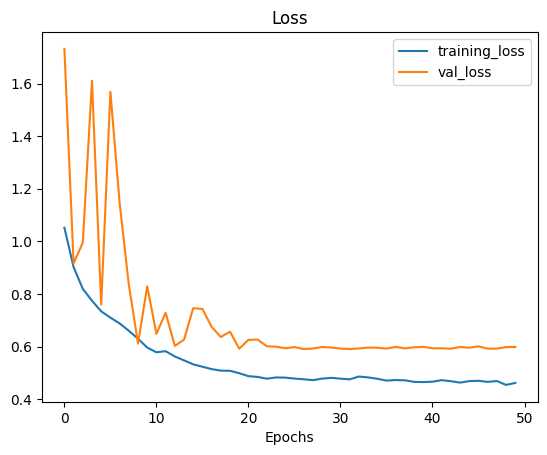

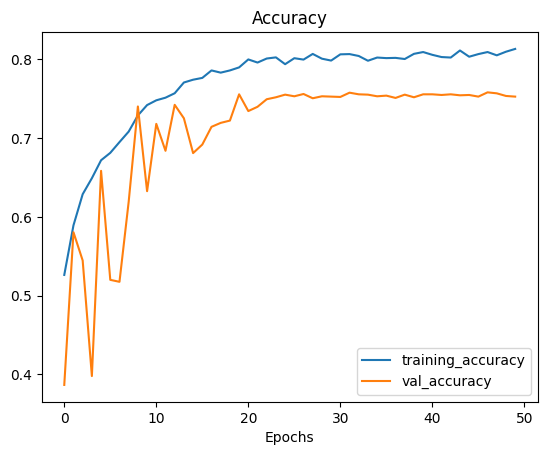

In [ ]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(len(history.history['loss']))

# Plot loss
plt.plot(epochs, loss, label='training_loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()

# Plot accuracy
plt.figure()
plt.plot(epochs, accuracy, label='training_accuracy')
plt.plot(epochs, val_accuracy, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend();

In [ ]:
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 10 predictions: {pred[:10]}')

188/188 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step
The first 10 predictions: ['Plastic Bag Images', 'Paper Bag Images', 'Paper Bag Images', 'Garbage Bag Images', 'Plastic Bag Images', 'Plastic Bag Images', 'Garbage Bag Images', 'Garbage Bag Images', 'Garbage Bag Images', 'Garbage Bag Images']


In [ ]:
y_test = list(test_df.Label)
report = classification_report(y_test, pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df

precision    recall  f1-score      support
Garbage Bag Images   0.832437  0.895853  0.862982  1037.000000
Paper Bag Images     0.717349  0.741188  0.729074   993.000000
Plastic Bag Images   0.735431  0.650515  0.690372   970.000000
accuracy             0.765333  0.765333  0.765333     0.765333
macro avg            0.761739  0.762519  0.760809  3000.000000
weighted avg         0.762978  0.765333  0.762848  3000.000000

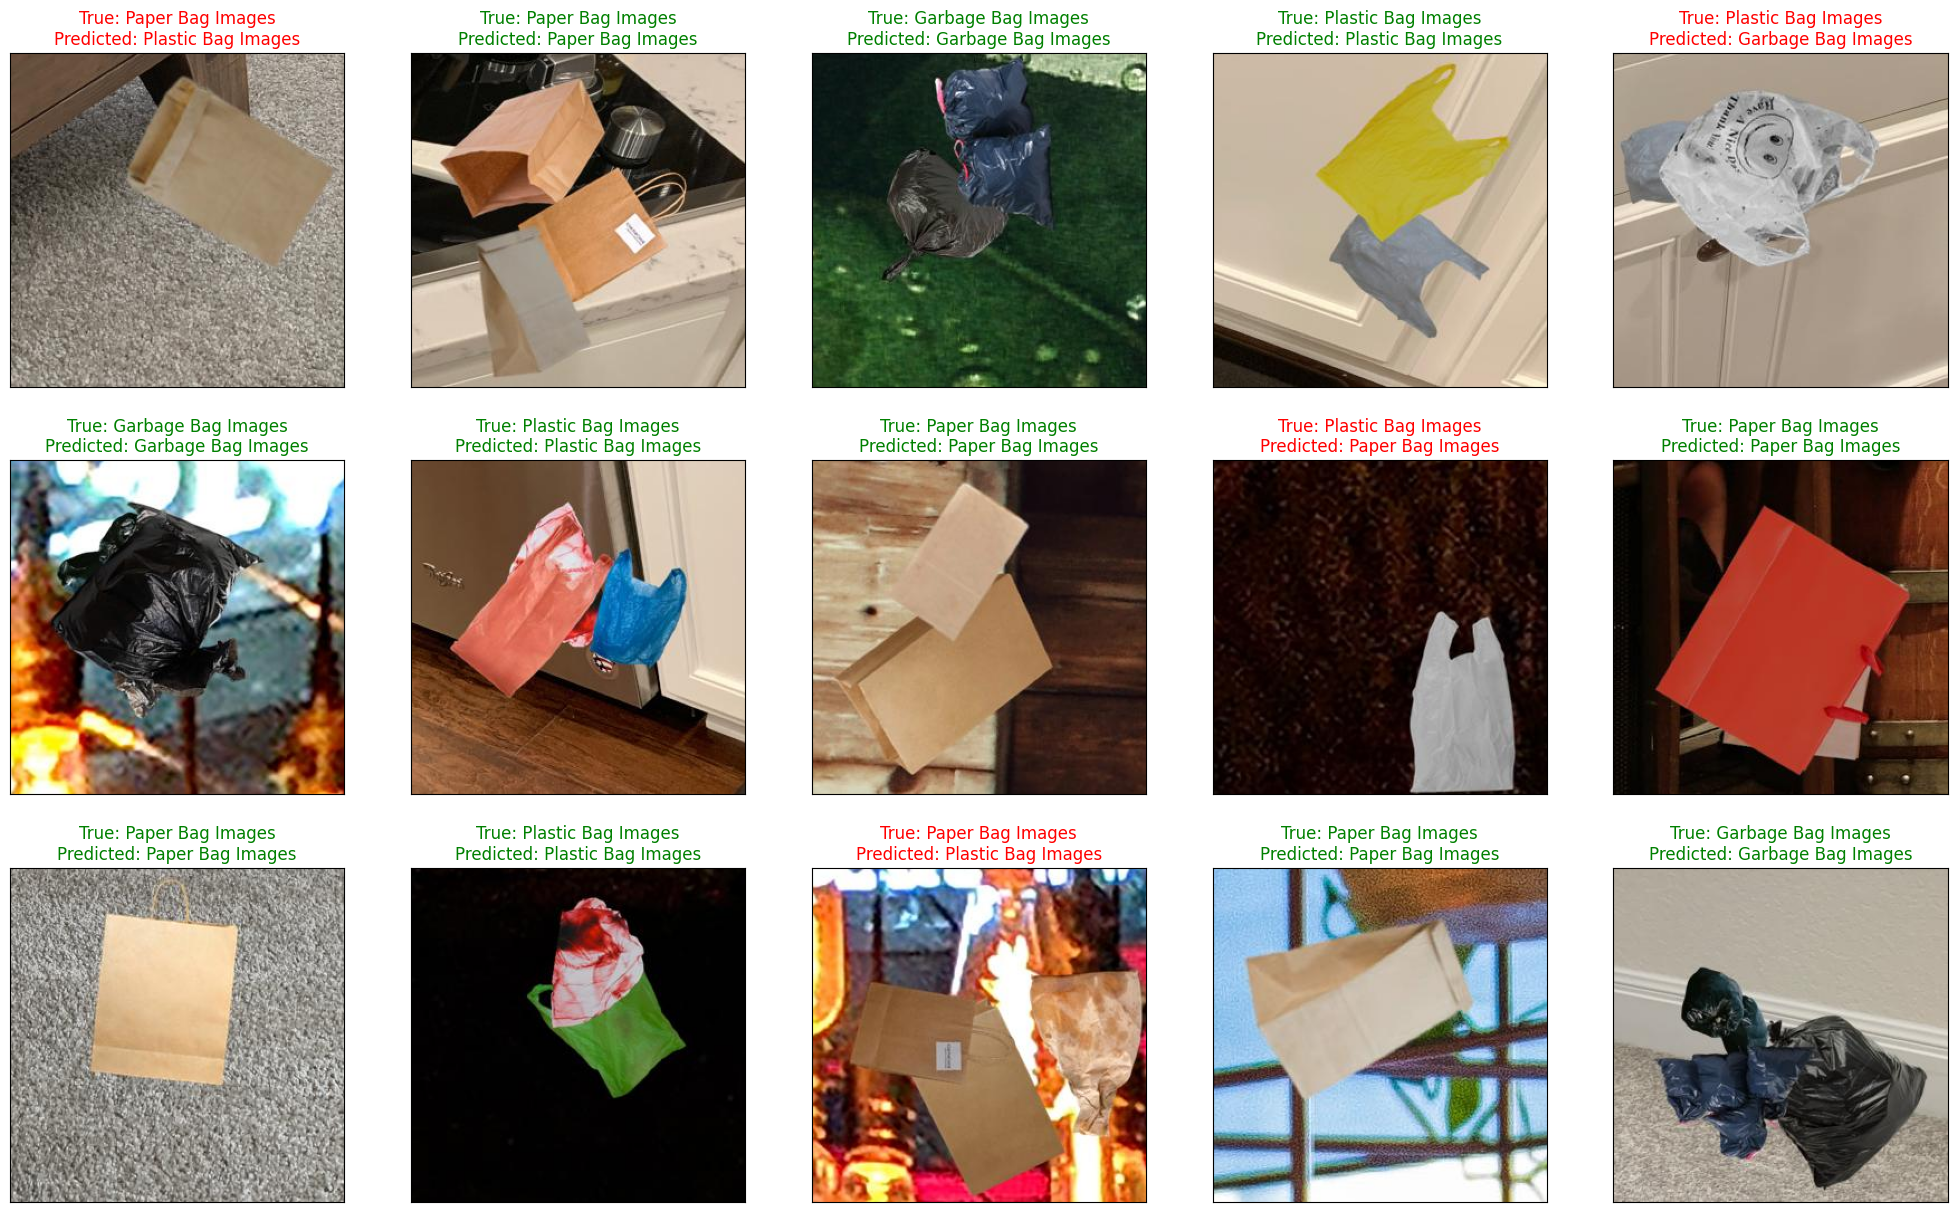

<Figure size 640x480 with 0 Axes>

In [ ]:
random_index = np.random.randint(0, len(test_df) - 1, 15)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[random_index[i]]))
    if test_df.Label.iloc[random_index[i]] == pred[random_index[i]]:
        color = "green"
    else:
        color = "red"
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}", color=color)
plt.show()
plt.tight_layout()


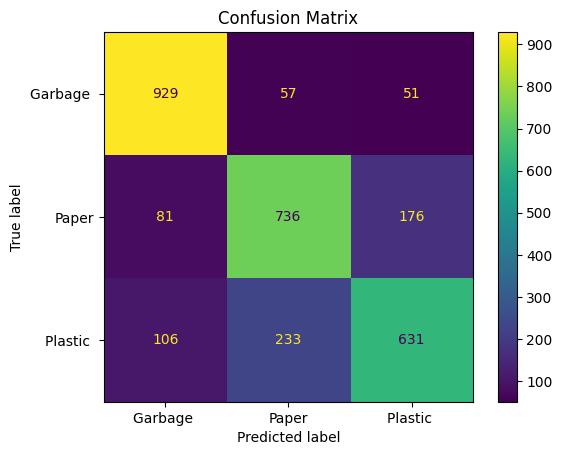

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Class names
class_names = ['Garbage ', 'Paper', 'Plastic ']

# Compute confusion matrix
cm = confusion_matrix(y_test, pred)

# Display confusion matrix with class names
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.viridis)  # You can choose any colormap you like
plt.title("Confusion Matrix")
plt.show()


Model loaded successfully!
Please upload an image:


Saving plastic.jpg to plastic.jpg
Image plastic.jpg uploaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


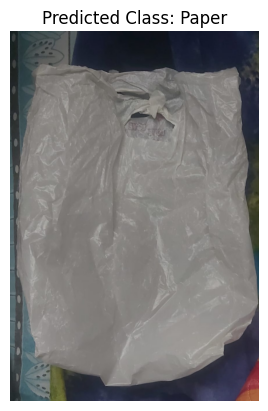

Prediction Probabilities: [[0.02297374 0.9269399  0.05008635]]
Predicted Class: Paper


In [ ]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt

# Function to upload an image file from the local device
def upload_image():
    print("Please upload an image:")
    uploaded = files.upload()  # Upload file(s) from your device
    image_path = list(uploaded.keys())[0]  # Get the uploaded file name
    print(f"Image {image_path} uploaded successfully!")
    return image_path

# Function to preprocess the image and predict the class
def predict_image(image_path, model, class_labels):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(224, 224))  # Resize to 224x224 for MobileNet
    img_array = img_to_array(img)  # Convert to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = preprocess_input(img_array)  # Preprocess for MobileNet

    # Predict the class
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]  # Get the highest probability index

    # Display the image and prediction
    plt.imshow(plt.imread(image_path))
    plt.title(f"Predicted Class: {class_labels[predicted_class]}")
    plt.axis('off')
    plt.show()

    # Print detailed results
    print(f"Prediction Probabilities: {predictions}")
    print(f"Predicted Class: {class_labels[predicted_class]}")

# Load your trained model
model_path = "best_model.keras"  # Path to your saved model
model = tf.keras.models.load_model(model_path)
print("Model loaded successfully!")

# Define your class labels
class_labels = ['Garbage ', 'Paper', 'Plastic ']

# Upload an image and make a prediction
image_path = upload_image()  # Upload image file
predict_image(image_path, model, class_labels)  # Predict the class


Model loaded successfully!
Please upload an image:


Saving grapage.jpg to grapage.jpg
Image grapage.jpg uploaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


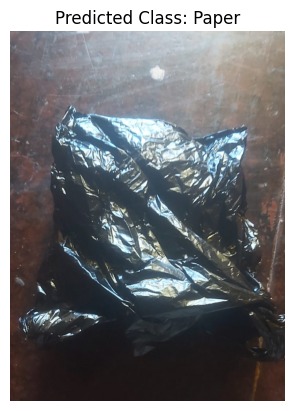

Prediction Probabilities: [[1.5595082e-12 9.9859589e-01 1.4040886e-03]]
Predicted Class: Paper


In [ ]:

model_path = "best_model.keras"  # Path to your saved model
model = tf.keras.models.load_model(model_path)
print("Model loaded successfully!")

# Define your class labels
class_labels = ['Garbage ', 'Paper', 'Plastic ']

# Upload an image and make a prediction
image_path = upload_image()  # Upload image file
predict_image(image_path, model, class_labels)  # Predict the class
